In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed, IntSlider, FloatSlider, Layout

In [2]:
# enter paths to csv files
nav_csv = r"c:\Users\Chris Yeung\Queen's University\Amoon Jamzad - Breast_navigated_iKnife\PalpableCase16\iKnifeSyncData.csv"
chr_xlsx = r"c:\Users\Chris Yeung\Queen's University\Amoon Jamzad - Breast_navigated_iKnife\PalpableCase16\Case16.xlsx"
caut_csv = r"c:\Users\Chris Yeung\Queen's University\Amoon Jamzad - Breast_navigated_iKnife\2024-05-10_1030_Engel\CauteryState.csv"
sheet_name = "Case016_TIC_XY"

In [3]:
# read nav csv
nav_df = pd.read_csv(nav_csv)
nav_df.head()

,Unnamed: 0,Time (s),Cautery Tip Needle,Distance To Tumour (mm),Cautery Speed (mm/s),Tumor Center RAS
0,0,14.060,[ 642.45898438 36.23315048 -371.45391846],689.259444,6.628998,[-189.63188171 -81.54257202 476.5229187 ]
1,1,14.136,[ 642.1060791 35.75275803 -371.13418579],688.781253,4.207435,[-188.57162476 -80.84890747 476.23324585]
2,2,14.195,[ 643.04742432 36.81842041 -371.42260742],689.784164,13.105245,[-189.42198181 -81.04749298 476.29959106]
3,3,14.274,[ 642.65093994 37.24803162 -372.76864624],690.078661,4.539161,[-188.42689514 -82.20110321 476.91082764]
4,4,14.334,[ 642.13964844 36.18621063 -373.54766846],689.892106,18.641595,[-189.56629944 -83.16803741 477.28424072]


In [4]:
# convert distance to tumor to binary value
nav_df["encroachment"] = nav_df["Distance To Tumour (mm)"] < 0
nav_df["encroachment"] = nav_df["encroachment"].astype(int)
nav_df.head()

,Unnamed: 0,Time (s),Cautery Tip Needle,Distance To Tumour (mm),Cautery Speed (mm/s),Tumor Center RAS,encroachment
0,0,14.060,[ 642.45898438 36.23315048 -371.45391846],689.259444,6.628998,[-189.63188171 -81.54257202 476.5229187 ],0
1,1,14.136,[ 642.1060791 35.75275803 -371.13418579],688.781253,4.207435,[-188.57162476 -80.84890747 476.23324585],0
2,2,14.195,[ 643.04742432 36.81842041 -371.42260742],689.784164,13.105245,[-189.42198181 -81.04749298 476.29959106],0
3,3,14.274,[ 642.65093994 37.24803162 -372.76864624],690.078661,4.539161,[-188.42689514 -82.20110321 476.91082764],0
4,4,14.334,[ 642.13964844 36.18621063 -373.54766846],689.892106,18.641595,[-189.56629944 -83.16803741 477.28424072],0


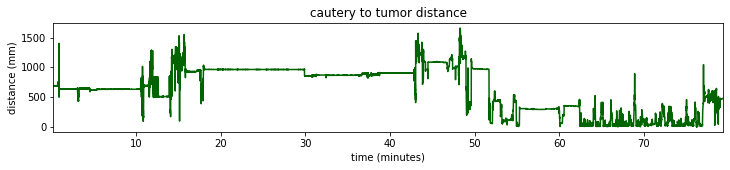

In [5]:
# plot encroachment
t_nav = nav_df["Time (s)"].values
t_nav = (t_nav) / 60 # convert from seconds to minutes
dist = nav_df["Distance To Tumour (mm)"].values

plt.figure(figsize=(12,2))
plt.plot(t_nav, dist, color='darkgreen')
plt.xlim([t_nav.min(), t_nav.max()])
plt.title('cautery to tumor distance')
plt.xlabel('time (minutes)')
plt.ylabel('distance (mm)')
plt.show()

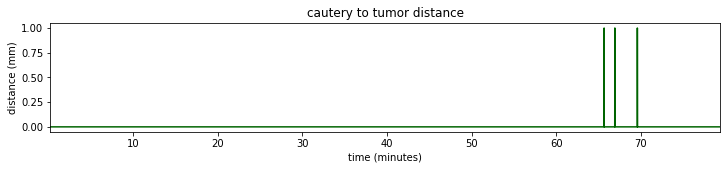

In [6]:
# plot encroachment
breach = nav_df["encroachment"].values

plt.figure(figsize=(12,2))
plt.plot(t_nav, breach, color='darkgreen')
plt.xlim([t_nav.min(), t_nav.max()])
plt.title('cautery to tumor distance')
plt.xlabel('time (minutes)')
plt.ylabel('distance (mm)')
plt.show()

In [7]:
# read chromatogram excel
chr_df = pd.read_excel(chr_xlsx, sheet_name=sheet_name)
chr_df.head()

,Time(min),Abundance,Unnamed: 2,Scan (No.),Abundance.1
0,0.034,199845648,NaN,1,199845648
1,0.051,202354464,NaN,2,202354464
2,0.067,212733072,NaN,3,212733072
3,0.084,205411648,NaN,4,205411648
4,0.101,208282496,NaN,5,208282496


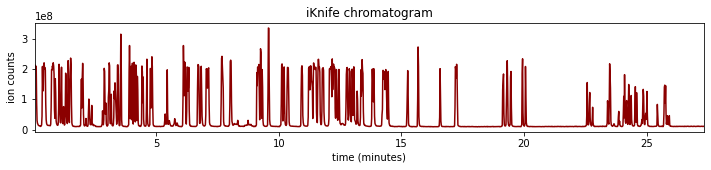

In [8]:
# plot chromatogram
chrom = chr_df["Abundance"].values
t_chrom = chr_df["Time(min)"].values
# s_chrom = chr_df["Scan (No.)"].values

plt.figure(figsize=(12,2))
plt.plot(t_chrom, chrom, color='darkred')
plt.xlim([t_chrom.min(), t_chrom.max()])
plt.title('iKnife chromatogram')
plt.xlabel('time (minutes)')
plt.ylabel('ion counts')
plt.show()

In [7]:
# cautery state
caut_df = pd.read_csv(caut_csv)
caut_df.head()

,time (min),cut on,coag on
0,0.000000,0,0
1,0.000695,0,0
2,0.001390,0,0
3,0.002085,0,0
4,0.002781,0,0


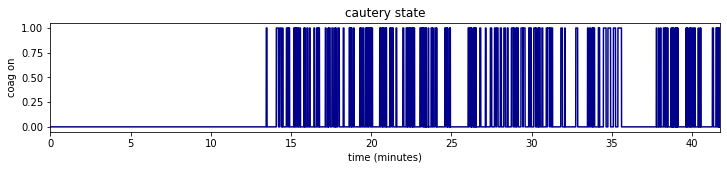

In [8]:
# plot cautery state
caut = caut_df["coag on"].values
t_caut = caut_df["time (min)"].values

plt.figure(figsize=(12,2))
plt.plot(t_caut, caut, color='darkblue')
plt.xlim([t_caut.min(), t_caut.max()])
plt.title('cautery state')
plt.xlabel('time (minutes)')
plt.ylabel('coag on')
plt.show()

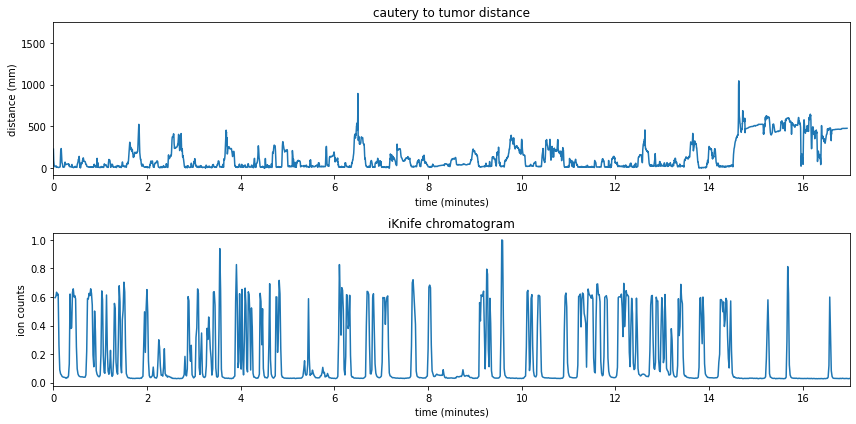

In [19]:
t_start = 0
t_width = 17
shift = -62.42
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[1].plot(t_chrom, chrom / chrom.max())
ax[1].set_xlim([t_start, t_start + t_width])
ax[1].set_title('iKnife chromatogram')
ax[1].set_xlabel('time (minutes)')
ax[1].set_ylabel('ion counts')

ax[0].plot(t_nav + shift, dist)
ax[0].set_xlim([t_start, t_start + t_width])
ax[0].set_title('cautery to tumor distance')
ax[0].set_xlabel('time (minutes)')
ax[0].set_ylabel('distance (mm)')

plt.tight_layout()
plt.show()

In [16]:
def dist_thresholding(shift, dist_thresh, t_start, t_width):
    plt.figure(figsize=(12,2))
    plt.title('chromatogram', loc='left')
    plt.plot(t_chrom, chrom / chrom.max())
    plt.xlim([t_start,t_start+t_width])
    plt.ylabel("normalized ion counts")
    # plt.yticks([])
    plt.figure(figsize=(12,2))
    plt.title('cautery tumor encroachment', loc='left')
    plt.plot(t_nav + shift, breach)
#     plt.plot(t_nav + shift, dist/dist.max())
    plt.xlim([t_start,t_start+t_width])
    plt.ylabel("encroachment")
    # plt.yticks([])
    # plt.xlabel('time (minutes)')
    plt.show()
    plt.figure(figsize=(12,2))
    plt.title("cautery distance to tumor", loc='left')
    # plt.title('cautery in '+str(dist_thresh)+' mm vicinity of tumor', loc='left')
    # plt.plot(t_chrom, chrom/chrom.max())
    plt.plot(t_nav + shift, dist)
    plt.xlim([t_start,t_start+t_width])
    plt.ylabel("distance (mm)")
    # plt.yticks([])
    plt.xlabel('time (minutes)')
    plt.show()

layout = Layout(width='700px')
aa = interact(dist_thresholding,
              shift = FloatSlider(value=-62.423, min=-70, max=70,step=0.01, layout=layout),
              dist_thresh = IntSlider(value=30, min=0, max=200, step=1, layout=layout),
              t_start = IntSlider(value=7, min=0, max=60, step=0.5, layout=layout),
              t_width = IntSlider(value=6, min=1, max=50, step=1, layout=layout),)

interactive(children=(FloatSlider(value=-62.423, description='shift', layout=Layout(width='700px'), max=70.0, …

In [9]:
def dist_thresholding(shift, dist_thresh, t_start, t_width):
    plt.figure(figsize=(12,2))
    plt.title('coag on', loc='left')
    plt.plot(t_caut, caut)
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.figure(figsize=(12,2))
    plt.title('cautery tumor encroachment', loc='left')
    plt.plot(t_nav + shift, breach)
#     plt.plot(t_nav + shift, dist/dist.max())
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.xlabel('time (minutes)')
    plt.show()
    plt.figure(figsize=(12,2))
    plt.title('cautery in '+str(dist_thresh)+' mm vicinity of tumor', loc='left')
    # plt.plot(t_chrom, chrom/chrom.max())
    plt.plot(t_nav + shift, dist)
    plt.xlim([t_start,t_start+t_width])
    plt.yticks([])
    plt.xlabel('time (minutes)')
    plt.show()

layout = Layout(width='700px')
aa = interact(dist_thresholding,
              shift = FloatSlider(value=-0.397, min=-20, max=20,step=0.01, layout=layout),
              dist_thresh = IntSlider(value=30, min=0, max=200, step=1, layout=layout),
              t_start = IntSlider(value=7, min=0, max=60, step=0.5, layout=layout),
              t_width = IntSlider(value=6, min=1, max=50, step=1, layout=layout),)

interactive(children=(FloatSlider(value=-0.397, description='shift', layout=Layout(width='700px'), max=20.0, m…